<a href="https://colab.research.google.com/github/angelinebj/ML2/blob/main/PCA_tarea_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
# librerías necesarias
from sklearn.datasets import load_iris
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#dataset
iris=load_iris()

X=iris.data
y=iris.target

In [34]:
# estandarización de los datos
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [35]:
#matriz de covarianza
cov=(X_scaled.transpose()@X_scaled)/(np.shape(X_scaled)[0]-1)
cov

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [36]:
# valores y vectores propios de la matriz de covarianza
eigenvals, eigenvects = np.linalg.eigh(cov)
print(eigenvals)
print(eigenvects)

[0.02085386 0.14774182 0.9201649  2.93808505]
[[ 0.26128628  0.71956635  0.37741762 -0.52106591]
 [-0.12350962 -0.24438178  0.92329566  0.26934744]
 [-0.80144925 -0.14212637  0.02449161 -0.5804131 ]
 [ 0.52359713 -0.63427274  0.06694199 -0.56485654]]


In [37]:
# valores y vectores propios organizados
idx = eigenvals.argsort()[::-1]
eigenvals = eigenvals[idx]
eigenvects = eigenvects[:,idx]

In [62]:
# utilizando 3 componentes principales
k = 3
w = eigenvects[:,:k]

#transformando el dataset
Y3 = X_scaled @ w
#print(Y)

# varianza explicada
explained_variance = eigenvals[:k] / np.sum(eigenvals)
print(f"varianza explicada utilizando 3 componentes: {explained_variance}")
print(f"varianza total explicada: {round(np.sum(explained_variance), 2)*100} %")

varianza explicada utilizando 3 componentes: [0.72962445 0.22850762 0.03668922]
varianza total explicada: 99.0 %


In [63]:
# utilizando 2 componentes principales
k = 2
w = eigenvects[:,:k]

#transformando el dataset
Y2 = X_scaled @ w
#print(Y)

# varianza explicada
explained_variance = eigenvals[:k] / np.sum(eigenvals)
print(f"varianza explicada utilizando 2 componentes: {explained_variance}")
print(f"varianza total explicada: {round(np.sum(explained_variance), 2)*100} %")

varianza explicada utilizando 2 componentes: [0.72962445 0.22850762]
varianza total explicada: 96.0 %


In [64]:
# utilizando 1 componente principal
k = 1
w = eigenvects[:,:k]

#transformando el dataset
Y1 = X_scaled @ w
#print(Y)

# varianza explicada
explained_variance = eigenvals[:k] / np.sum(eigenvals)
print(f"varianza explicada utilizando 1 componente: {explained_variance}")
print(f"varianza total explicada: {round(np.sum(explained_variance), 2)*100} %")

varianza explicada utilizando 1 componente: [0.72962445]
varianza total explicada: 73.0 %


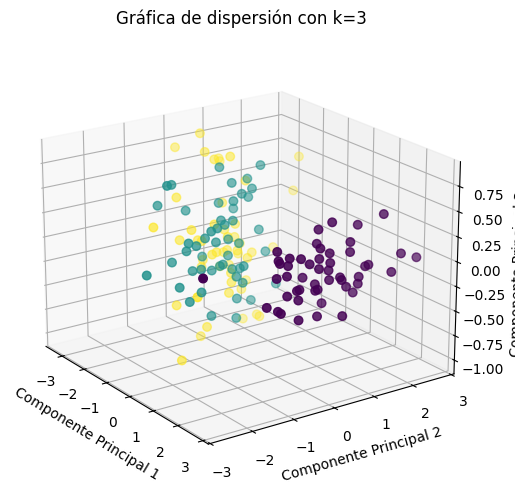

In [90]:
# gráfica dispersión de los datos con k=3

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Y3[:, 0], Y3[:, 1], Y3[:, 2], c=y, cmap="viridis", s=38)
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Gráfica de dispersión con k=3')
ax.set_zlabel('Componente Principal 3')
ax.view_init(elev=20, azim=-35, roll=0)
plt.show()

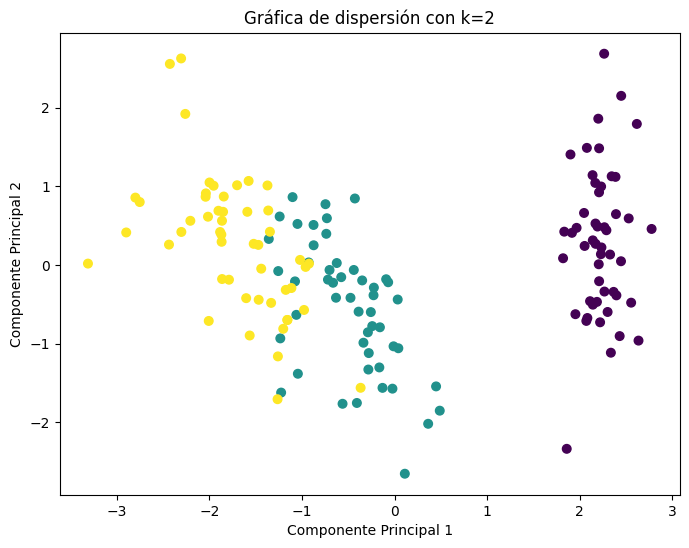

In [92]:
#gráfica con 2 componentes principales

fig = plt.figure(figsize=(8, 6))

plt.scatter(Y2[:, 0], Y2[:, 1], c=y, cmap="viridis", s=38)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Gráfica de dispersión con k=2')
plt.show()